# Wrangle and Analyze Data
Is the fifth project in the Data Wrangling section in the Udacity [Data Analyst Nanodegree](https://eu.udacity.com/course/data-analyst-nanodegree--nd002) program.


## Context
__Goal__: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


[The weird underside of DoggoLingo](https://blog.oxforddictionaries.com/2017/08/01/doggolingo/)

In [1]:
import requests
import os, sys
import re
import pandas as pd
import numpy as np
import zipfile
import json
import twitter_api
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DOWNLOADS_DIR = 'downloads'
IMAGES_DIR = 'images'

def ensure_dir(file_path=DOWNLOADS_DIR):
    """
    Ensure directory exists or create it.
    :param file_path: directory path
    :return: 
    """
    if not os.path.exists(file_path):
        os.makedirs(file_path)

        
def download(*urls):
    """
    Download files from the provided URL.
    :param urls: variable number of URL
    :return: None
    """
    ensure_dir()
    for url in urls:
        url_file = os.path.join(DOWNLOADS_DIR, url.split(os.path.sep)[-1]).replace('-', '_')
        if not os.path.exists(url_file):
            response = requests.get(url, allow_redirects=True)
            with open(url_file, 'wb') as handle:
                handle.write(response.content)
                sys.stdout.write('.')
    sys.stdout.write('\n')


def download_img(name, url):
    """
    Download image from the provided URL
    :param name: name of image file
    :param url: URL for image
    :return: None
    """
    ensure_dir(IMAGES_DIR)
    image_file = os.path.join(IMAGES_DIR, f"{name}.{url.split('.')[-1]}")
    if not os.path.exists(image_file):
        response = requests.get(url, allow_redirects=True)
        with open(image_file, 'wb') as handle:
            handle.write(response.content)


def zip_extract(file):
    """
    Extract alla files from a zip archive.
    :param file: file name of archive.
    :return: a list of file names in the archive.
    """
    with zipfile.ZipFile(os.path.join(DOWNLOADS_DIR, file), 'r') as zip_ref:
        zip_ref.extractall(DOWNLOADS_DIR)
        return zip_ref.namelist()

def rename(file_from, file_to, directory=DOWNLOADS_DIR):
    """
    Rename file in the 
    :param file_from: Existing file to rename
    :param file_to: Target file name
    :param directory: Source directory, defaults to DOWNLOADS_DIR
    :return: None
    """
    source = os.path.join(directory, file_from)
    if os.path.exists(source):
        os.rename(source, os.path.join(directory, file_to))


def file_exists(filename, directory=DOWNLOADS_DIR):
    """
    Check if the file exists in a optional provided directory.
    :param filename: name of file
    :param directory: Source directory, defaults to DOWNLOADS_DIR
    :return: True if file exists.
    """
    return os.path.exists(os.path.join(directory, filename))

## Gather

In [39]:
# download the provided data sources
download('https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv',
         'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
print(os.listdir(DOWNLOADS_DIR))


['.DS_Store', 'image_predictions.tsv', 'twitter_archive_enhanced.csv', 'tweet_json.txt']


In [40]:
# Rename file to addhere to the expected project submission
rename('image-predictions.tsv', 'image_predictions.tsv')
rename('twitter-archive-enhanced.csv', 'twitter_archive_enhanced.csv')
print(os.listdir(DOWNLOADS_DIR))

['.DS_Store', 'image_predictions.tsv', 'twitter_archive_enhanced.csv', 'tweet_json.txt']


### Download Twitter Tweets

This code cell expects that a file `twitter_api.py` exists in the same folder as this notebook.
One function `get_api` should exists that returns a fully configured `tweepy.API` instance.

In [6]:
from tweepy import TweepError
tweets_file = os.path.join(DOWNLOADS_DIR, 'tweet_json.txt')
failures = []
if not os.path.exists(tweets_file):
    api = twitter_api.get_api()
    with open(tweets_file, 'w', encoding='utf-8') as file:  
        for tweet_id in twitter_df['tweet_id'].to_list():
            try:
                raw_tweet = api.get_status(tweet_id, tweet_mode='extended')
                file.write(json.dumps(raw_tweet._json))
                file.write('\n')
                sys.stdout.write('.')
            except TweepError as te:
                sys.stdout.write('X')
                failures.append(f'Tweet ID {tweet_id} failed: {te}')
        sys.stdout.write('\n')
    print(failures)
else:
    print(f'The file {tweets_file} already exist. Nothing downloaded.')

...................X...........................................................................X.....X..X.............X.............X......................X...........................................................................................X............X.....................................X...

Rate limit reached. Sleeping for: 397


................................................................................X...........................................................................................................................X...........................................................X.........................................................................................................................................................................................................................X.................................X.................................................................................................................X.............................................................................................................................................................................................................................................................................

Rate limit reached. Sleeping for: 647


............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................X.......................................................................................................................................................................................................................................................................................................................................................................................

Rate limit reached. Sleeping for: 651


..............................................................................................................................................................................................................................................................
["Tweet ID 888202515573088257 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 873697596434513921 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872668790621863937 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872261713294495745 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 869988702071779329 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 866816280283807744 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 861769973181624320 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 845459076796616705 failed: [{'code': 144,

### Download Twitte Tweets output
...................X...........................................................................X.....X..X.............X.............X......................X...........................................................................................X............X.....................................X...  
Rate limit reached. Sleeping for: 397  
................................................................................X...........................................................................................................................X...........................................................X.........................................................................................................................................................................................................................X.................................X.................................................................................................................X.............................................................................................................................................................................................................................................................................  
Rate limit reached. Sleeping for: 647  
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................X.......................................................................................................................................................................................................................................................................................................................................................................................  
Rate limit reached. Sleeping for: 651  
..............................................................................................................................................................................................................................................................

["Tweet ID 888202515573088257 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 873697596434513921 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872668790621863937 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 872261713294495745 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 869988702071779329 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 866816280283807744 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 861769973181624320 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 845459076796616705 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 842892208864923648 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 837012587749474308 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 827228250799742977 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 812747805718642688 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 802247111496568832 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 775096608509886464 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 770743923962707968 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 754011816964026368 failed: [{'code': 144, 'message': 'No status found with that ID.'}]", "Tweet ID 680055455951884288 failed: [{'code': 144, 'message': 'No status found with that ID.'}]"]

### Load Pandas DataFrames

In [3]:
twitter_df = pd.read_csv(os.path.join(DOWNLOADS_DIR, 'twitter_archive_enhanced.csv'))

In [4]:
tweet_df = pd.read_json(os.path.join(DOWNLOADS_DIR, 'tweet_json.txt'), lines=True)

In [5]:
image_pred_df = pd.read_csv(os.path.join(DOWNLOADS_DIR, 'image_predictions.tsv'), sep='\t')

## Assess

### Data file twitter-archive-enhanced.csv

Problems identified in data set.

* tweet_id - convert to string, identity and not used for calculations
* timestamp - convert to datetime
* in_reply_to_status_id - only 78 posts, consider dropping column
* in_reply_to_user_id - only 78 posts, consider dropping column
* name - None as null value, not only names in columns

Qualitative variables that could be stored in one column:
* doggo - None as null value
* floofer - None as null value
* pupper - None as null value
* puppo - None as null value
* full_text - same data as __text__ column in tweet_json.txt file


In [3]:
twitter_df.iloc[:5, :7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN


In [126]:
twitter_df.iloc[:5, 7:]

,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [127]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
twitter_df[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
            'retweeted_status_user_id', 'rating_numerator', 'rating_denominator']].describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
not_names = twitter_df[twitter_df['name'].str.match('^[a-z]')]['name']
not_names.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [7]:
print(twitter_df['doggo'].value_counts(), '\n')
print(twitter_df['floofer'].value_counts(), '\n')
print(twitter_df['pupper'].value_counts(), '\n')
print(twitter_df['puppo'].value_counts(), '\n')

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



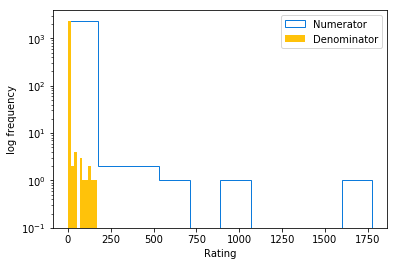

In [41]:
fig, ax = plt.subplots()
ax.hist(twitter_df['rating_numerator'], color='#0C7BDC', histtype='step', log=True, label='Numerator')
ax.hist(twitter_df['rating_denominator'], color='#FFC20A', histtype='stepfilled', log=True, label='Denominator')
ax.set_xlabel('Rating')
ax.set_ylabel('log frequency')
ax.legend()
fig.savefig(os.path.join(IMAGES_DIR, 'rating-histogram.jpg'))
plt.show();

### Data file tweet_json.txt 

Problems identified in data set.

Drop column since all values are missing:
* contributors
* coordinates 
* geo
* place - one row have value
* possibly_sensitive - all rows have zero (0)
* possibly_sensitive_appealable - all rows have zero (0)

* id - convert to string, identity
* source - categorical values can be extracted N{iphone, android}


* full_text - same data as __text__ column in `twitter_archive_enhanced.csv` file

In [4]:
tweet_df.iloc[:5,:8]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37786,False
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32465,False
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24439,False
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41115,False
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39330,False


In [172]:
tweet_df.iloc[:5,8:16]

,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id
0,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN
1,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN
2,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN
3,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN
4,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN


In [173]:
tweet_df.iloc[:5,16:24]

,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id
0,NaN,False,en,None,0.0,0.0,NaN,NaN
1,NaN,False,en,None,0.0,0.0,NaN,NaN
2,NaN,False,en,None,0.0,0.0,NaN,NaN
3,NaN,False,en,None,0.0,0.0,NaN,NaN
4,NaN,False,en,None,0.0,0.0,NaN,NaN


In [174]:
tweet_df.iloc[:5,24:]

,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,8236,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,6087,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,4028,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,8393,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,9090,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [7]:
tweet_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2339.000000,0.0,2.339000e+03,2.339000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2203.0,2203.0,2.600000e+01,2.600000e+01,2339.000000
mean,NaN,NaN,7900.328345,NaN,7.421620e+17,7.421620e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2903.433091
std,NaN,NaN,12245.660513,NaN,6.828729e+16,6.828729e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4895.523842
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1368.000000,NaN,6.783378e+17,6.783378e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,583.500000
50%,NaN,NaN,3438.000000,NaN,7.186133e+17,7.186133e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1354.000000
75%,NaN,NaN,9679.500000,NaN,7.986907e+17,7.986907e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3383.500000
max,NaN,NaN,163180.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,82974.000000


### Data file image-predictions.tsv

Problems identified in data set.

* tweet_id - convert to string, identity  

In [5]:
image_pred_df.iloc[:5,:6]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [194]:
image_pred_df.iloc[:5,6:]

,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,malinois,0.138584,True,bloodhound,0.116197,True
3,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,Rottweiler,0.243682,True,Doberman,0.154629,True


In [195]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Clean

### Cleaning twitter_df

Try to find more dogtionary words from the tweet text.  
Fix None values on the four columns: doggo, floofer, pupper, puppo.   
Reshape dogtionary names into one column.
Remove retweets.




In [113]:
twitter_clean_df = twitter_df.copy()

In [114]:
dogtionary_words = ['doggo', 'floofer', 'floof', 'pupper', 'puppo']
columns_to_save = [col for col in twitter_df.columns.to_list() if col not in dogtionary_words]
columns_to_save

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name']

In [115]:
# add dogtionary status into one column
dogtionary = twitter_df[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.NaN)

In [155]:
def get_dogtionary(series):
    values = [val for val in series.dropna().values]
    names = ', '.join(values)
    if len(names) > 1:
        return names

twitter_clean_df['dogtionary'] = dogtionary[['doggo', 'floofer', 'pupper', 'puppo']].apply(get_dogtionary, axis=1)
twitter_clean_df['dogtionary'].value_counts().sort_index()

doggo              83
doggo, floofer      1
doggo, pupper      12
doggo, puppo        1
floofer             9
pupper            245
puppo              29
Name: dogtionary, dtype: int64

Extract Dogtionary words from text column

In [158]:
matcher = re.compile(pattern='|'.join(dogtionary_words))
def extract_type(series):
    names = matcher.findall(series['text'])
    if len(names) > 0:
        found = set(names)
        if series['dogtionary']:
            exists = [category.strip() for category in series['dogtionary'].split(',')]
            found.update(exists)
        series['dogtionary'] = ', '.join(found)
    return series

twitter_clean_df[['text', 'dogtionary']] = twitter_clean_df[['text', 'dogtionary']].apply(extract_type, axis=1)
twitter_clean_df['dogtionary'].value_counts().sort_index()

doggo              92
doggo, floofer      1
doggo, pupper      12
floof              19
floof, floofer      1
floofer             8
pupper            269
puppo              36
puppo, doggo        2
Name: dogtionary, dtype: int64

In [159]:
 twitter_clean_df['tweet_id'] = twitter_clean_df['tweet_id'].astype(str)

In [160]:
# Drop retweets
retweet_id_isnull = twitter_clean_df['retweeted_status_id'].isnull()
retweet_user_isnull = twitter_clean_df['retweeted_status_user_id'].isnull()
retweet_timestamp_isnull = twitter_clean_df['retweeted_status_timestamp'].isnull()

twitter_clean_df = twitter_clean_df[retweet_id_isnull | retweet_user_isnull | retweet_timestamp_isnull]
twitter_clean_df = twitter_clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dogtionary               402 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 271.9+ KB


In [161]:
# Drop reply
reply_status_isnull = twitter_clean_df['in_reply_to_status_id'].isnull()
reply_user_isnull = twitter_clean_df['in_reply_to_user_id'].isnull()

twitter_clean_df = twitter_clean_df[reply_status_isnull | reply_user_isnull]
twitter_clean_df = twitter_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dogtionary            391 non-null object
dtypes: int64(2), object(11)
memory usage: 229.4+ KB


In [162]:
# list of names that start with only lower letters
names_to_remove = twitter_clean_df.name.value_counts(dropna=True).filter(regex='^[a-z]', axis=0)
names_to_remove.sum()

104

In [163]:
# remove and replace with NaN
twitter_clean_df.name.replace(to_replace='^[a-z]', value=np.nan, regex=True, inplace=True)
twitter_clean_df.name.isnull().sum()

104

In [63]:
# clean up unused variables
#TODO what to clean
del columns_to_save
del names_to_remove
del dogtionary

NameError: name 'columns_to_save' is not defined

In [164]:
client_matcher = re.compile(pattern='>.*<')
twitter_clean_df['client'] = twitter_clean_df.source.apply(lambda x: client_matcher.findall(x)[0][1:-1])
twitter_clean_df.client.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: client, dtype: int64

In [166]:
columns_to_drop = ['expanded_urls', 'source']
twitter_clean_df.drop(columns_to_drop, axis=1, inplace=True)
twitter_clean_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dogtionary', 'client'],
      dtype='object')

In [167]:
# Parse timestamp column
twitter_clean_df['timestamp'] = pd.to_datetime(twitter_clean_df.timestamp)
twitter_clean_df.timestamp.dtype

datetime64[ns, UTC]

### Cleaning tweet_df

In [20]:
tweet_clean_df = tweet_df.copy()
tweet_clean_df['id'] = tweet_clean_df['id'].astype(str)

In [21]:
# extract Twitter client
tweet_clean_df['client'] = tweet_df.source.apply(lambda x: x.split('"')[1].split('/')[-1])
tweet_clean_df['client'].value_counts()

iphone         2205
vine.co          91
twitter.com      33
tweetdeck        10
Name: client, dtype: int64

In [22]:
namePattern = re.compile('named ([A-Z]\w+)')
def extract_name(text):
    names = namePattern.findall(text)
    if names:
        return names[0]
    return np.NaN

tweet_clean_df['new_name'] = tweet_clean_df['full_text'].apply(extract_name)
tweet_clean_df[tweet_clean_df['new_name'].isnull() == False][['id', 'new_name']].set_index('id')
tweet_clean_df.new_name.value_counts()

Tickles      2
Octaviath    1
Alfredo      1
Guss         1
Chuk         1
Kip          1
Cherokee     1
Leroi        1
Cheryl       1
Johm         1
Pepe         1
Hemry        1
Kohl         1
Jessiga      1
Berta        1
Wylie        1
Rufus        1
Alphred      1
Klint        1
Zeus         1
Spork        1
Jacob        1
Alfonso      1
Name: new_name, dtype: int64

In [23]:
columns_to_drop = ['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorited',
       'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweeted', 'client',
       'retweeted_status', 'source', 'truncated', 'user']
tweet_clean_df.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_clean_df.drop(columns_to_drop, axis=1, inplace=True)
tweet_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
favorite_count    2339 non-null int64
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
new_name          24 non-null object
dtypes: int64(2), object(2)
memory usage: 73.2+ KB


### Cleaning of image_pred_df

In [24]:
# rename columns
pred_tidy = image_pred_df.copy()
pred_tidy.rename(columns={'p1': 'p1_category', 
                          'p2': 'p2_category', 
                          'p3': 'p3_category', 
                          'p1_conf': 'p1_confidence', 
                          'p2_conf': 'p2_confidence', 
                          'p3_conf': 'p3_confidence'}, inplace=True)
pred_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null int64
jpg_url          2075 non-null object
img_num          2075 non-null int64
p1_category      2075 non-null object
p1_confidence    2075 non-null float64
p1_dog           2075 non-null bool
p2_category      2075 non-null object
p2_confidence    2075 non-null float64
p2_dog           2075 non-null bool
p3_category      2075 non-null object
p3_confidence    2075 non-null float64
p3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# convert identity to string
pred_tidy['tweet_id'] = pred_tidy['tweet_id'].astype(str)
pred_tidy['tweet_id'].dtype


dtype('O')

### Create Twitter archive master

In [26]:
master_df = twitter_clean_df.copy()

# add new extracted dog names
for row in tweet_clean_df[['tweet_id', 'new_name']].itertuples():
    x = master_df[master_df['tweet_id'] == str(row.Index)]
    if not x.empty:
        print(x[['tweet_id', 'name']], row.new_name)
        x['name'] = row.new_name

In [27]:
master_df = master_df.merge(tweet_clean_df, on='tweet_id', how='inner')
master_df = master_df.merge(pred_tidy, on='tweet_id', how='inner')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 22 columns):
tweet_id              1998 non-null object
timestamp             1998 non-null datetime64[ns, UTC]
text                  1998 non-null object
rating_numerator      1998 non-null int64
rating_denominator    1998 non-null int64
name                  1358 non-null object
dogtionary            333 non-null object
client                1998 non-null object
favorite_count        1998 non-null int64
retweet_count         1998 non-null int64
new_name              23 non-null object
jpg_url               1998 non-null object
img_num               1998 non-null int64
p1_category           1998 non-null object
p1_confidence         1998 non-null float64
p1_dog                1998 non-null bool
p2_category           1998 non-null object
p2_confidence         1998 non-null float64
p2_dog                1998 non-null bool
p3_category           1998 non-null object
p3_confidence         1998 non

In [28]:
REPORT_DATA_SET_FILE = 'twitter_archive_master.csv'
master_df.to_csv(REPORT_DATA_SET_FILE, index=False)

## Analysis

In [44]:
ensure_dir(IMAGES_DIR)

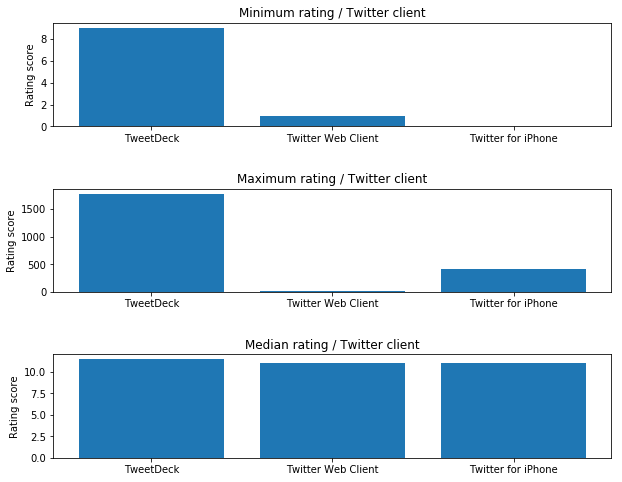

In [108]:
# Does the different Twitter clients rate dogs differently?
master_group_one = master_df[master_df['group'] == 'p1']
rating_client_agg = master_group_one.groupby('client', as_index=False).agg({'rating_numerator': ['min', 'max', 'median']})
rating_client_agg.columns = ['client', 'min', 'max', 'median']
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,8))
ax1.bar(rating_client_agg['client'], rating_client_agg['min'])
ax1.set(ylabel='Rating score', 
        title='Minimum rating / Twitter client')
ax2.bar(rating_client_agg['client'], rating_client_agg['max'])
ax2.set(ylabel='Rating score',
        title='Maximum rating / Twitter client')
ax3.bar(rating_client_agg['client'], rating_client_agg['median'])
ax3.set(ylabel='Rating score',
        title='Median rating / Twitter client')
plt.subplots_adjust(hspace=0.6)
fig.savefig(os.path.join(IMAGES_DIR, 'rating-client-outliers.jpg'))
plt.show()

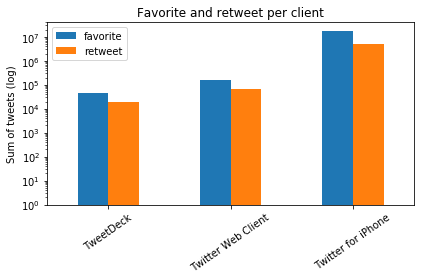

In [87]:
# How are the different Twitter clients used for setting favorites and retweets?
share_agg = master_group_one.groupby('client', as_index=False).agg({'favorite_count': ['sum'], 'retweet_count': ['sum']})
share_agg.columns = ['client', 'favorite', 'retweet']
ax = share_agg.plot('client', ['favorite', 'retweet'], kind='bar', log=True)
ax.set_title('Favorite and retweet per client')
ax.set_xlabel('')
ax.tick_params(axis='x', labelrotation=35)
ax.set_ylabel('Sum of tweets (log)')
plt.tight_layout()
plt.savefig(os.path.join(IMAGES_DIR, 'favorite-and-retweet-per-client.jpg'))
plt.show()

In [88]:
share_agg

,client,favorite,retweet
0,TweetDeck,43312,19317
1,Twitter Web Client,161940,68487
2,Twitter for iPhone,17457890,5283208


In [104]:
# download random images for the report
import random
for i in range(3):
    download_img(f'dog-{i}.jpg', random.choice(pred_tidy.jpg_url.to_list()))
print(os.listdir(IMAGES_DIR))

['rating-client-outliers.jpg', 'dog-1.jpg.jpg', 'dog-0.jpg.jpg', 'dog-2.jpg.jpg', 'favorite-and-retweet-per-client.jpg']


In [102]:
# top 10 most common dog names
name_agg = master_group_one.groupby(['name'])['name'].count()
name_agg.sort_values(ascending=False)[:10]

name
Lucy       10
Cooper     10
Oliver     10
Charlie    10
Tucker      9
Penny       9
Sadie       8
Winston     8
Daisy       7
Lola        7
Name: name, dtype: int64

In [128]:
print(f'Dogs with no name found: {master_group_one.name.isnull().sum() / master_group_one.name.shape[0]:.3f}')

Dogs with no name found: 0.320


In [118]:
print(f'Tweet period start: {master_df.timestamp.min()} - end: {master_df.timestamp.max()}')

Tweet period start: 2015-11-15 22:32:08+00:00 - end: 2017-08-01 16:23:56+00:00


# Assert project ready for submission
The following files needs to be included in the submission of the project

In [109]:
print(f"{file_exists('wrangle_act.ipynb', directory='.')} - wrangle_act.ipynb: code for gathering, assessing, cleaning, analyzing, and visualizing data")
print(f"{file_exists('wrangle_report.pdf', directory='.')} - wrangle_report.pdf or wrangle_report.html: documentation for data wrangling steps: gather, assess, and clean")
print(f"{file_exists('act_report.pdf', directory='.')} - act_report.pdf or act_report.html: documentation of analysis and insights into final data")
print(f"{file_exists('twitter_archive_enhanced.csv')} - twitter_archive_enhanced.csv: file as given")
print(f"{file_exists('image_predictions.tsv')} - image_predictions.tsv: file downloaded programmatically")
print(f"{file_exists('tweet_json.txt')} - tweet_json.txt: file constructed via API")
print(f"{file_exists('twitter_archive_master.csv', directory='.')} - twitter_archive_master.csv: combined and cleaned data")
      

True - wrangle_act.ipynb: code for gathering, assessing, cleaning, analyzing, and visualizing data
True - wrangle_report.pdf or wrangle_report.html: documentation for data wrangling steps: gather, assess, and clean
False - act_report.pdf or act_report.html: documentation of analysis and insights into final data
True - twitter_archive_enhanced.csv: file as given
True - image_predictions.tsv: file downloaded programmatically
True - tweet_json.txt: file constructed via API
True - twitter_archive_master.csv: combined and cleaned data
